# Machine Learning and Bollinger Bands

## Part 1: Set-Up

In [5]:
import pandas as pd 
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

### First, we load in data of certain popular tech stocks

In [7]:
#Set dates from 2000 to today
start_date = '2000-01-01'
end_date = '2020-09-04'

#Load in data for Apple from Yahoo Finance
df_apple = data.DataReader('AAPL', 'yahoo', start_date, end_date)



### For this case, we continue with Apple.
-Display the head/tail of the dataframes to see what we are working with

In [8]:
print(df_apple.head())
print(df_apple.tail())

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2000-01-03  1.004464  0.907924  0.936384  0.999442  535796800.0   0.863657
2000-01-04  0.987723  0.903460  0.966518  0.915179  512377600.0   0.790842
2000-01-05  0.987165  0.919643  0.926339  0.928571  778321600.0   0.802415
2000-01-06  0.955357  0.848214  0.947545  0.848214  767972800.0   0.732975
2000-01-07  0.901786  0.852679  0.861607  0.888393  460734400.0   0.767695
                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-08-31  131.000000  126.000000  127.580002  129.039993  225702700.0   
2020-09-01  134.800003  130.529999  132.759995  134.179993  152470100.0   
2020-09-02  137.979996  127.000000  137.589996  131.399994  200119000.0   
2020-09-03  128.839996  120.500000  126.910004  120.879997  254723200.0   
2020-09-04  123.699997  1

-The data is indexed by date, which we want, and we have all the columns we want as well (open/close).
-The data also appears to be generally clean, so we can continue to work with it.

## Here, we calculate the 30 day moving average, and the 30 day standard deviation.
### These are used to calculate the upper/lower Bollinger bands 

In [29]:
df_apple['30d mavg'] = df_apple['Close'].rolling(window=30).mean()
df_apple['30d std'] = df_apple['Close'].rolling(window=30).std()

df_apple['Upper Band'] = df_apple['30d mavg'] + (df_apple['30d std'] * 2)
df_apple['Lower Band'] = df_apple['30d mavg'] - (df_apple['30d std'] * 2)

## We plot the Bollinger Bands of Apple to get a visualization
### This is what we are going to want the machine to fit

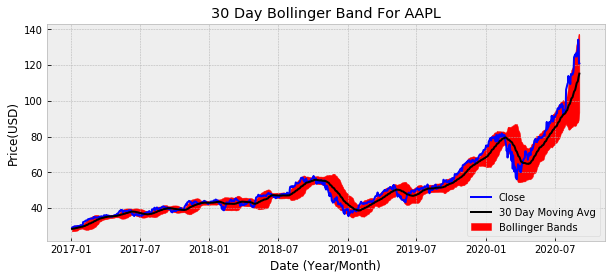

In [48]:

#Columns that we want to plot
cols = ['30d mavg','Upper Band','Lower Band', 'Close']

#Creating a small dataframe to plot        
df_Boll = df_apple[cols]['2017': '2020'] #Uses columns from above for years from 2017-2019

#Creating blank plot
plt.style.use('bmh')
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

#X axis is the dates
x_axis = df_Boll.index.get_level_values(0)

#Plot a band between calculated upper band and lower band
ax.fill_between(x_axis, df_Boll['Upper Band'], df_Boll['Lower Band'], color='red', label='Bollinger Bands')

#Additionally, plot the close and 30 day moving average for reference
ax.plot(x_axis, df_Boll['Close'], color='blue', lw=2, label='Close')
ax.plot(x_axis, df_Boll['30d mavg'], color='black', lw=2, label='30 Day Moving Avg')

#Labeling
ax.legend(loc='lower right')
ax.set_title('30 Day Bollinger Band For AAPL')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show()

## Part 2: Machine Learning

### Now, we need to begin setting up our data for ML. We first create a dependent and independent variable.

### Our dependent variable is Percent Change, since that uses Open and Close, while the latter are our independent variables.

In [32]:
#Set X to mavg and std, set Y's to upper/lower band
X = df_apple[['30d mavg', '30d std']]['2001':'2020']
Y = df_apple[['Upper Band']]['2001':'2020']
Y2 = df_apple[['Lower Band']]['2001':'2020']

display(X)
display(Y)
#display(Y2)

30d mavg    30d std
Date                             
2001-01-02    0.285175   0.031974
2001-01-03    0.283910   0.030856
2001-01-04    0.282794   0.029397
2001-01-05    0.281343   0.027709
2001-01-08    0.280190   0.026282
...                ...        ...
2020-08-31  110.952667  11.499380
2020-09-01  112.192000  11.938910
2020-09-02  113.329583  12.093205
2020-09-03  114.264083  11.525555
2020-09-04  115.208916  10.830489

[4951 rows x 2 columns]

Upper Band
Date                  
2001-01-02    0.349124
2001-01-03    0.345623
2001-01-04    0.341588
2001-01-05    0.336762
2001-01-08    0.332755
...                ...
2020-08-31  133.951426
2020-09-01  136.069820
2020-09-02  137.515992
2020-09-03  137.315193
2020-09-04  136.869895

[4951 rows x 1 columns]

### Split into test and train data

In [33]:
#Import machine learning
from sklearn.model_selection import train_test_split

# Create test and train data for upper/lower band
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2)

### Fit using Linear Regression

In [44]:
#Import linear regression fit
from sklearn.linear_model import LinearRegression

#Set model to Linear Regression and fit to upper/lower band train data
UB_model = LinearRegression()
UB_model.fit(X_train, Y_train.values.ravel())

LB_model = LinearRegression()
LB_model.fit(X2_train, Y2_train.values.ravel())

#Calculate R^2 values to ensure fit is good
UB_score = UB_model.score(X_train, Y_train.values.ravel())
LB_score = LB_model.score(X2_train, Y2_train.values.ravel())

print( 'The R^2 value for the Upper Bound fit is:', UB_score )
print( 'The R^2 value for the Lower Bound fit is:', LB_score )



The R^2 value for the Upper Bound fit is: 1.0
The R^2 value for the Lower Bound fit is: 1.0


### Use test data to make predictions

In [46]:
#Import numpy in order to predict
import numpy as np

#Predict U/L with the test data
UB_prediction = UB_model.predict(X_test)
LB_prediction = LB_model.predict(X2_test)

### Plot to compare 

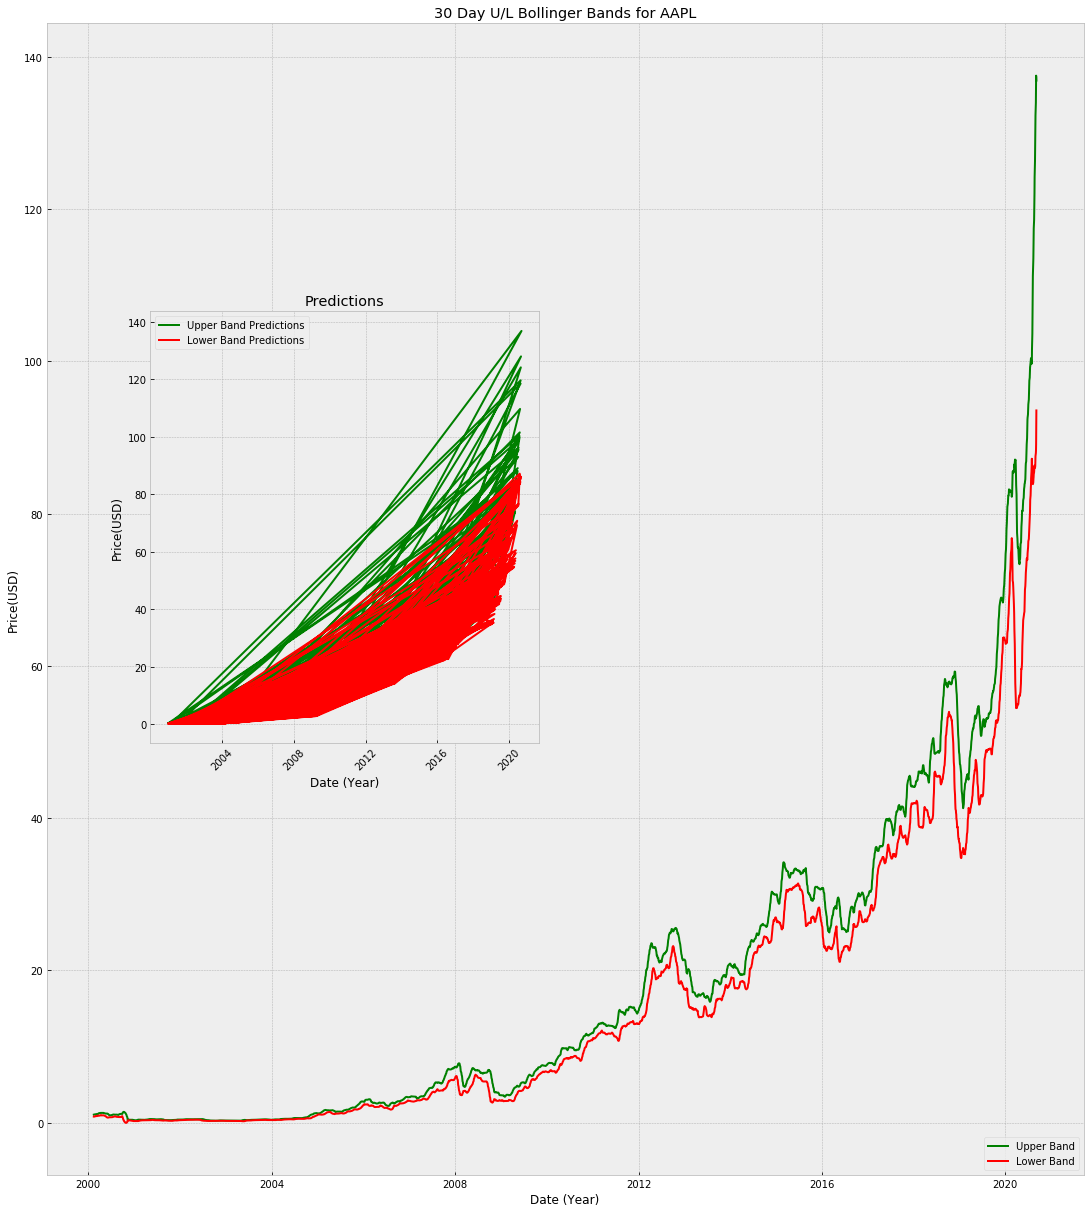

In [55]:

plt.style.use('bmh')

fig = plt.figure(figsize=(18, 20))


axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])#larger plot, actual
axes2 = fig.add_axes([0.18, 0.4, 0.3, 0.3])#smaller plot, predictions


#Actual band data
x1 = df_apple.index.date
y1 = df_apple['Upper Band']
y2 = df_apple['Lower Band']

#Predicted Upper band data
x2 = X_test.index
y3 = UB_prediction

#Predicted Lower band data
x3 = X2_test.index
y4 = LB_prediction

#Plot Date vs Price for all bands
axes1.plot(x1, y1, 'g', label='Upper Band')
axes1.plot(x1, y2, 'r', label = 'Lower Band')
axes2.plot(x2, y3, 'g', label = 'Upper Band Predictions')
axes2.plot(x3, y4, 'r', label = 'Lower Band Predictions')


#Labeling
axes1.legend(loc='lower right')
axes1.set_title('30 Day U/L Bollinger Bands for AAPL')
axes1.set_xlabel('Date (Year)')
axes1.set_ylabel('Price(USD)')

plt.xticks(rotation=45)
axes2.set_title('Predictions')
axes2.legend(loc='upper left')
axes2.set_xlabel('Date (Year)')
axes2.set_ylabel('Price(USD)')

plt.show()